In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import geocoder
import folium 

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns

%matplotlib inline

In [2]:
url='https://cocl.us/new_york_dataset'
resp=requests.get(url).json()
# all data is present in features label
features=resp['features']
    
# define DF Columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
# initial DF
new_york_data = pd.DataFrame(columns=column_names)


for data in features:
    borough = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    

In [3]:
new_york_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [4]:
new_york_data.dtypes

Borough          object
Neighborhood     object
Latitude        float64
Longitude       float64
dtype: object

In [5]:
new_york_data.shape

(306, 4)

So there are total of 306 Neighborhoods in New York

In [6]:
NY_groupby_Borough = new_york_data.groupby(['Borough']).count()

In [7]:
NY_groupby_Borough

,Neighborhood,Latitude,Longitude
Borough,,,
Bronx,52,52,52
Brooklyn,70,70,70
Manhattan,40,40,40
Queens,81,81,81
Staten Island,63,63,63


In [8]:
NY_groupby_Borough['Borough'] = NY_groupby_Borough.index

In [9]:
NY_groupby_Borough

,Neighborhood,Latitude,Longitude,Borough
Borough,,,,
Bronx,52,52,52,Bronx
Brooklyn,70,70,70,Brooklyn
Manhattan,40,40,40,Manhattan
Queens,81,81,81,Queens
Staten Island,63,63,63,Staten Island


In [10]:
NY_groupby_Borough.sort_values(by=['Neighborhood'], ascending=False, inplace=True)

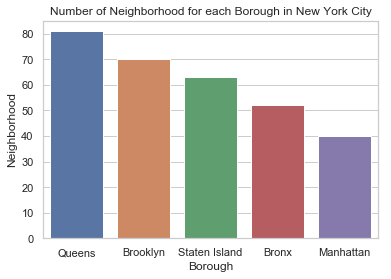

In [11]:
sns.set(style="whitegrid")

ax = sns.barplot(x="Borough", y="Neighborhood", data=NY_groupby_Borough).set_title('Number of Neighborhood for each Borough in New York City')

In [12]:
def get_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=100
    CLIENT_ID = 'AYA5DIEGPCBBH0DA2ZIW13TWSZ10HXWUT50MEDM4RXYTP0EE' 
    CLIENT_SECRET = 'AG1AX34VSVE1TIUGLUOHQOE2MTZGWYNNIDNIMKRH5XPOH0NU' 
    VERSION = '20190605' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)

    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [13]:
# Prepare column_names
column_names=['Borough', 'Neighborhood', 'ID','Name']

# initial DF
thai_rest=pd.DataFrame(columns=column_names)

count=1
for row in new_york_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    thai_restaurants_list=venues[venues['Category']=='Thai Restaurant']   
    print('[',count,'/',len(new_york_data),']','Thai Resturants in ('+Neighborhood+', '+Borough+') Count:'+str(len(thai_restaurants_list)))
    for resturant_details in thai_restaurants_list.values.tolist():
        id, name , category=resturant_details
        
        # Append to  thai_rest DF
        thai_rest = thai_rest.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name}, ignore_index=True)
    count = count+1

[ 1 / 306 ] Thai Resturants in (Wakefield, Bronx) Count:0
[ 2 / 306 ] Thai Resturants in (Co-op City, Bronx) Count:0
[ 3 / 306 ] Thai Resturants in (Eastchester, Bronx) Count:0
[ 4 / 306 ] Thai Resturants in (Fieldston, Bronx) Count:0
[ 5 / 306 ] Thai Resturants in (Riverdale, Bronx) Count:1
[ 6 / 306 ] Thai Resturants in (Kingsbridge, Bronx) Count:1
[ 7 / 306 ] Thai Resturants in (Marble Hill, Manhattan) Count:1
[ 8 / 306 ] Thai Resturants in (Woodlawn, Bronx) Count:0
[ 9 / 306 ] Thai Resturants in (Norwood, Bronx) Count:0
[ 10 / 306 ] Thai Resturants in (Williamsbridge, Bronx) Count:0
[ 11 / 306 ] Thai Resturants in (Baychester, Bronx) Count:0
[ 12 / 306 ] Thai Resturants in (Pelham Parkway, Bronx) Count:0
[ 13 / 306 ] Thai Resturants in (City Island, Bronx) Count:0
[ 14 / 306 ] Thai Resturants in (Bedford Park, Bronx) Count:0
[ 15 / 306 ] Thai Resturants in (University Heights, Bronx) Count:0
[ 16 / 306 ] Thai Resturants in (Morris Heights, Bronx) Count:0
[ 17 / 306 ] Thai Resturant

[ 130 / 306 ] Thai Resturants in (Astoria, Queens) Count:2
[ 131 / 306 ] Thai Resturants in (Woodside, Queens) Count:6
[ 132 / 306 ] Thai Resturants in (Jackson Heights, Queens) Count:5
[ 133 / 306 ] Thai Resturants in (Elmhurst, Queens) Count:13
[ 134 / 306 ] Thai Resturants in (Howard Beach, Queens) Count:0
[ 135 / 306 ] Thai Resturants in (Corona, Queens) Count:0
[ 136 / 306 ] Thai Resturants in (Forest Hills, Queens) Count:2
[ 137 / 306 ] Thai Resturants in (Kew Gardens, Queens) Count:0
[ 138 / 306 ] Thai Resturants in (Richmond Hill, Queens) Count:0
[ 139 / 306 ] Thai Resturants in (Flushing, Queens) Count:0
[ 140 / 306 ] Thai Resturants in (Long Island City, Queens) Count:1
[ 141 / 306 ] Thai Resturants in (Sunnyside, Queens) Count:1
[ 142 / 306 ] Thai Resturants in (East Elmhurst, Queens) Count:0
[ 143 / 306 ] Thai Resturants in (Maspeth, Queens) Count:0
[ 144 / 306 ] Thai Resturants in (Ridgewood, Queens) Count:0
[ 145 / 306 ] Thai Resturants in (Glendale, Queens) Count:0
[ 146

[ 255 / 306 ] Thai Resturants in (Concord, Staten Island) Count:0
[ 256 / 306 ] Thai Resturants in (Emerson Hill, Staten Island) Count:0
[ 257 / 306 ] Thai Resturants in (Randall Manor, Staten Island) Count:0
[ 258 / 306 ] Thai Resturants in (Howland Hook, Staten Island) Count:0
[ 259 / 306 ] Thai Resturants in (Elm Park, Staten Island) Count:0
[ 260 / 306 ] Thai Resturants in (Remsen Village, Brooklyn) Count:0
[ 261 / 306 ] Thai Resturants in (New Lots, Brooklyn) Count:0
[ 262 / 306 ] Thai Resturants in (Paerdegat Basin, Brooklyn) Count:0
[ 263 / 306 ] Thai Resturants in (Mill Basin, Brooklyn) Count:0
[ 264 / 306 ] Thai Resturants in (Jamaica Hills, Queens) Count:1
[ 265 / 306 ] Thai Resturants in (Utopia, Queens) Count:0
[ 266 / 306 ] Thai Resturants in (Pomonok, Queens) Count:0
[ 267 / 306 ] Thai Resturants in (Astoria Heights, Queens) Count:0
[ 268 / 306 ] Thai Resturants in (Claremont Village, Bronx) Count:0
[ 269 / 306 ] Thai Resturants in (Concourse Village, Bronx) Count:0
[ 270

In [14]:
thai_rest.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Riverdale,4b94a4a2f964a520787f34e3,Nam Thai
1,Bronx,Kingsbridge,4b94a4a2f964a520787f34e3,Nam Thai
2,Manhattan,Marble Hill,4a739e29f964a520f5dc1fe3,Siam Square
3,Bronx,Country Club,4b4c90d3f964a52046b626e3,Honey's Thai Pavilion
4,Bronx,Parkchester,5585c948498e0bd8a8a706f1,Thai No. 1


In [15]:
thai_rest_group_Neighborhood = thai_rest.groupby(['Neighborhood'])['ID'].count()

In [16]:
thai_rest_group_Neighborhood = thai_rest_group_Neighborhood.reset_index()

In [17]:
thai_rest_group_Neighborhood.rename(columns={'ID':'count'}, inplace=True)

In [18]:
thai_rest_group_Neighborhood.head()

,Neighborhood,count
0,Arverne,1
1,Astoria,2
2,Auburndale,1
3,Bay Ridge,1
4,Bayside,2


In [19]:
thai_rest_group_Neighborhood.sort_values(by=['count'], ascending=False, inplace=True)
thai_rest_group_Neighborhood = thai_rest_group_Neighborhood.reset_index()

In [20]:
thai_rest_group_Neighborhood[:5]

,index,Neighborhood,count
0,20,Elmhurst,13
1,80,Woodside,6
2,40,Kensington,5
3,36,Jackson Heights,5
4,57,Ravenswood,4


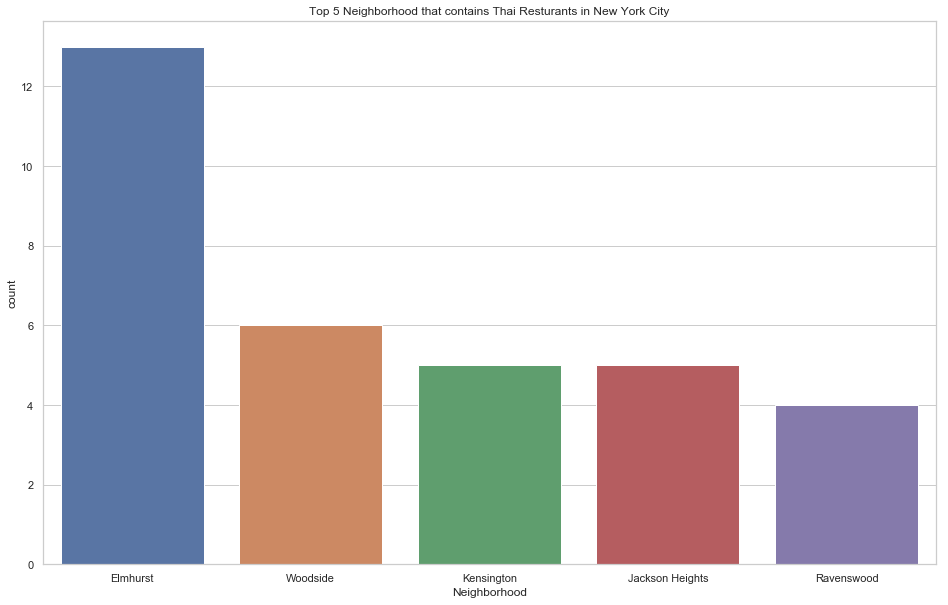

In [21]:
# Visualize
fig = plt.gcf()
fig.set_size_inches( 16, 10)

sns.set(style="whitegrid")

ax = sns.barplot(x="Neighborhood", y="count", data=thai_rest_group_Neighborhood[ :5]).set_title('Top 5 Neighborhood that contains Thai Resturants in New York City')

In [22]:
thai_rest_group_Borough = thai_rest.groupby(['Borough'])['ID'].count()
thai_rest_group_Borough = thai_rest_group_Borough.reset_index()
thai_rest_group_Borough.rename(columns={'ID':'count'}, inplace=True)
thai_rest_group_Borough.sort_values(by=['count'], ascending=False, inplace=True)
thai_rest_group_Borough = thai_rest_group_Borough.reset_index()

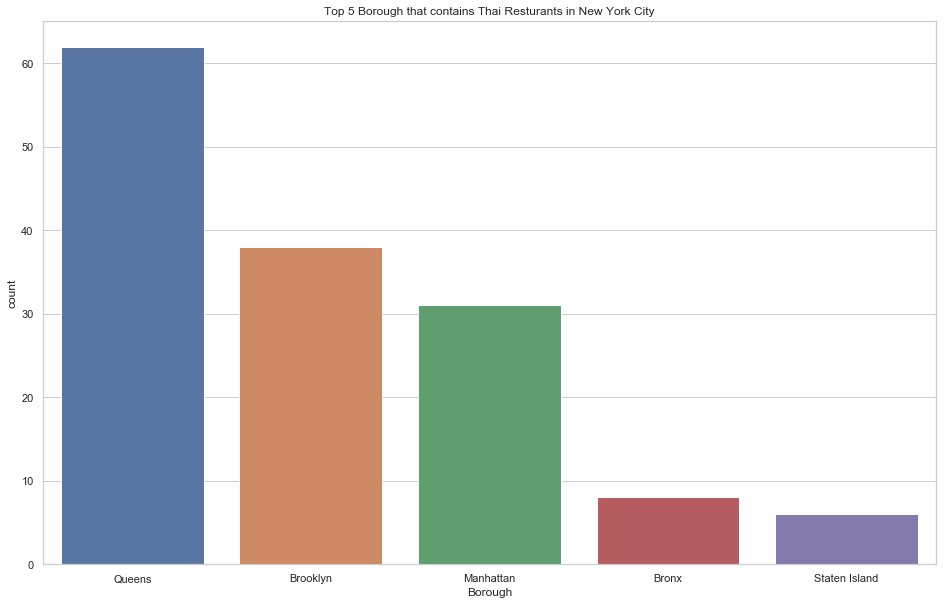

In [23]:
# Visualize
fig = plt.gcf()
fig.set_size_inches( 16, 10)

sns.set(style="whitegrid")

ax = sns.barplot(x="Borough", y="count", data=thai_rest_group_Borough[ :5]).set_title('Top 5 Borough that contains Thai Resturants in New York City')

So Elmhurst got highest number of Thai Restaurants.

## Details for Thai restaurants in Elmhurst

We will get detail from Thai restaurants only from Emhurst cause of Foursquare APIs limitations. Can get only 100 restaurants

In [81]:
def get_details(venue_id):
        
    CLIENT_ID = 'OVWQCNSXAN3O43LFHJLDJULOMCKU2TYDRTQY2DJRQTTWU5YA' 
    CLIENT_SECRET = '4OBBJZAB5P142BSOJAVCNKQ214MV1GT5BEYFW41SZNEDC04U' 
    VERSION = '20190610' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # Get Result
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

Find ranking of each Thai resturant.

In [82]:
# define column names
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']

# initial DF
thai_rest_details=pd.DataFrame(columns=column_names)

count=1

for row in thai_rest[:100].values.tolist():
    Borough, Neighborhood, ID, Name=row
    try:
        venue_details=get_details(ID)
        #print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('[',count,'/',len(thai_rest[:100]),']')
    thai_rest_details = thai_rest_details.append({'Borough': Borough,
                                            'Neighborhood': Neighborhood, 
                                            'ID': id,
                                            'Name' : name,
                                            'Likes' : likes,
                                            'Rating' : rating,
                                            'Tips' : tips}, ignore_index=True)
    count+=1

{'meta': {'code': 200, 'requestId': '5d245866a6ec98002c6b4135'}, 'response': {'venue': {'id': '4b94a4a2f964a520787f34e3', 'name': 'Nam Thai', 'contact': {'phone': '7184322570', 'formattedPhone': '(718) 432-2570'}, 'location': {'address': '3525 Johnson Ave', 'lat': 40.88621093794359, 'lng': -73.90999084202346, 'labeledLatLngs': [{'label': 'display', 'lat': 40.88621093794359, 'lng': -73.90999084202346}], 'postalCode': '10463', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['3525 Johnson Ave', 'Bronx, NY 10463', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/nam-thai/4b94a4a2f964a520787f34e3', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 5}, 'url': 'http://namthaibronx.com', 'price': {'tier': 2, 

{'meta': {'code': 200, 'requestId': '5d245868bcbf7a002c5c7c23'}, 'response': {'venue': {'id': '4a739e29f964a520f5dc1fe3', 'name': 'Siam Square', 'contact': {'phone': '7184328200', 'formattedPhone': '(718) 432-8200'}, 'location': {'address': '564 Kappock St', 'lat': 40.8787962348852, 'lng': -73.91670090763066, 'labeledLatLngs': [{'label': 'display', 'lat': 40.8787962348852, 'lng': -73.91670090763066}], 'postalCode': '10463', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['564 Kappock St', 'Bronx, NY 10463', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/siam-square/4a739e29f964a520f5dc1fe3', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 13}, 'url': 'http://www.siamsq.com', 'price': {'tier': 2, '

{'meta': {'code': 200, 'requestId': '5d245869deb4957974556019'}, 'response': {'venue': {'id': '4b4c90d3f964a52046b626e3', 'name': "Honey's Thai Pavilion", 'contact': {'phone': '7187922803', 'formattedPhone': '(718) 792-2803', 'facebook': '174518199256018', 'facebookUsername': 'HoneysThai', 'facebookName': "Honey's Thai Pavilion"}, 'location': {'address': '3036 Westchester Ave', 'crossStreet': 'At Hobart Ave', 'lat': 40.84784479852375, 'lng': -73.83131988215104, 'labeledLatLngs': [{'label': 'display', 'lat': 40.84784479852375, 'lng': -73.83131988215104}], 'postalCode': '10461', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['3036 Westchester Ave (At Hobart Ave)', 'Bronx, NY 10461', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/honeys-thai-pavilion/4b4c90d3f964a52046b626e3', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'htt

{'meta': {'code': 200, 'requestId': '5d245869db1d81002ceef038'}, 'response': {'venue': {'id': '5585c948498e0bd8a8a706f1', 'name': 'Thai No. 1', 'contact': {'phone': '6464069664', 'formattedPhone': '(646) 406-9664', 'twitter': 'thaino1bronx'}, 'location': {'address': '1509 White Plains Rd', 'lat': 40.83808930070679, 'lng': -73.86363494389862, 'labeledLatLngs': [{'label': 'display', 'lat': 40.83808930070679, 'lng': -73.86363494389862}], 'postalCode': '10462', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1509 White Plains Rd', 'Bronx, NY 10462', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/thai-no-1/5585c948498e0bd8a8a706f1', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 1}, 'price': {'tier':

{'meta': {'code': 200, 'requestId': '5d24586b429bfc1ccf763d3d'}, 'response': {'venue': {'id': '4a739e29f964a520f5dc1fe3', 'name': 'Siam Square', 'contact': {'phone': '7184328200', 'formattedPhone': '(718) 432-8200'}, 'location': {'address': '564 Kappock St', 'lat': 40.8787962348852, 'lng': -73.91670090763066, 'labeledLatLngs': [{'label': 'display', 'lat': 40.8787962348852, 'lng': -73.91670090763066}], 'postalCode': '10463', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['564 Kappock St', 'Bronx, NY 10463', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/siam-square/4a739e29f964a520f5dc1fe3', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 13}, 'url': 'http://www.siamsq.com', 'price': {'tier': 2, '

{'meta': {'code': 200, 'requestId': '5d24586c531593002f500770'}, 'response': {'venue': {'id': '4b94a4a2f964a520787f34e3', 'name': 'Nam Thai', 'contact': {'phone': '7184322570', 'formattedPhone': '(718) 432-2570'}, 'location': {'address': '3525 Johnson Ave', 'lat': 40.88621093794359, 'lng': -73.90999084202346, 'labeledLatLngs': [{'label': 'display', 'lat': 40.88621093794359, 'lng': -73.90999084202346}], 'postalCode': '10463', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['3525 Johnson Ave', 'Bronx, NY 10463', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/nam-thai/4b94a4a2f964a520787f34e3', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 5}, 'url': 'http://namthaibronx.com', 'price': {'tier': 2, 

{'meta': {'code': 200, 'requestId': '5d24586d92e7a94ad4a0faec'}, 'response': {'venue': {'id': '50e8d45ae4b06202fbe39b08', 'name': 'Top Thai', 'contact': {}, 'location': {'address': '4th Ave.', 'crossStreet': '85th St.', 'lat': 40.62323607887372, 'lng': -74.02817264059682, 'labeledLatLngs': [{'label': 'display', 'lat': 40.62323607887372, 'lng': -74.02817264059682}], 'postalCode': '11209', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['4th Ave. (85th St.)', 'Brooklyn, NY 11209', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/top-thai/50e8d45ae4b06202fbe39b08', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 11}, 'url': 'http://brooklyntopthai.com', 'price': {'tier': 2, 'message': 'Moderate', 'c

{'meta': {'code': 200, 'requestId': '5d24586f018cbb002c1d5b24'}, 'response': {'venue': {'id': '4ac3a58ef964a5202d9c20e3', 'name': 'Ott', 'contact': {'phone': '7186092416', 'formattedPhone': '(718) 609-2416'}, 'location': {'address': '970 Manhattan Ave', 'crossStreet': 'at India St', 'lat': 40.732350431719375, 'lng': -73.95452501167034, 'labeledLatLngs': [{'label': 'display', 'lat': 40.732350431719375, 'lng': -73.95452501167034}], 'postalCode': '11222', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['970 Manhattan Ave (at India St)', 'Brooklyn, NY 11222', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/ott/4ac3a58ef964a5202d9c20e3', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': True, 'stats': {'tipCount': 34}, 'price': {'

{'meta': {'code': 200, 'requestId': '5d2458710d2be7002cc736a0'}, 'response': {'venue': {'id': '5903f2d9c21cb14daa03993f', 'name': 'Corthaiyou', 'contact': {'phone': '7186767388', 'formattedPhone': '(718) 676-7388', 'facebook': '123157154895069', 'facebookName': 'Cor.THAI.you'}, 'location': {'address': '1310 Cortelyou Rd', 'crossStreet': 'btwn Rugby & Argyle Rds', 'lat': 40.640415091940994, 'lng': -73.96594620923894, 'labeledLatLngs': [{'label': 'display', 'lat': 40.640415091940994, 'lng': -73.96594620923894}], 'postalCode': '11226', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1310 Cortelyou Rd (btwn Rugby & Argyle Rds)', 'Brooklyn, NY 11226', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/corthaiyou/5903f2d9c21cb14daa03993f', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/t

{'meta': {'code': 200, 'requestId': '5d24587286bc49002c379024'}, 'response': {'venue': {'id': '593b1eabfc9e940adf8a5da1', 'name': 'Mondayoff By Plant Love House', 'contact': {}, 'location': {'address': '752 Coney Island Ave', 'lat': 40.63915760197772, 'lng': -73.96881082984439, 'labeledLatLngs': [{'label': 'display', 'lat': 40.63915760197772, 'lng': -73.96881082984439}], 'postalCode': '11218', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['752 Coney Island Ave', 'New York, NY 11218', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/mondayoff-by-plant-love-house/593b1eabfc9e940adf8a5da1', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 9}, 'price': {'tier': 2, 'message': 'Moderate', 'currency': 

{'meta': {'code': 200, 'requestId': '5d2458728afbe0002db938f5'}, 'response': {'venue': {'id': '596ffbcadee77066f36be772', 'name': 'Ruammit Thai', 'contact': {}, 'location': {'address': '742 Nostrand Ave', 'crossStreet': 'Park Pl', 'lat': 40.673146208437025, 'lng': -73.95020548637376, 'labeledLatLngs': [{'label': 'display', 'lat': 40.673146208437025, 'lng': -73.95020548637376}], 'postalCode': '11216', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['742 Nostrand Ave (Park Pl)', 'New York, NY 11216', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/ruammit-thai/596ffbcadee77066f36be772', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 5}, 'url': 'http://ruammitthaibk.com', 'price': {'tier': 2, 'mes

{'meta': {'code': 200, 'requestId': '5d2458739df1dc7a94c6fe6c'}, 'response': {'venue': {'id': '4b36a0f5f964a5207b3925e3', 'name': 'To Be Thai', 'contact': {'phone': '7184350459', 'formattedPhone': '(718) 435-0459'}, 'location': {'address': '126 Beverley Rd', 'crossStreet': 'East 2nd Street', 'lat': 40.642891374675024, 'lng': -73.97833412411897, 'labeledLatLngs': [{'label': 'display', 'lat': 40.642891374675024, 'lng': -73.97833412411897}], 'postalCode': '11218', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['126 Beverley Rd (East 2nd Street)', 'Brooklyn, NY 11218', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/to-be-thai/4b36a0f5f964a5207b3925e3', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount

{'meta': {'code': 200, 'requestId': '5d2458740d2be7002cc748a2'}, 'response': {'venue': {'id': '5bbf7c31418686002c49a6a1', 'name': 'Thai Farm Kitchen', 'contact': {'phone': '3475339368', 'formattedPhone': '(347) 533-9368'}, 'location': {'address': '416 Church Ave', 'lat': 40.64414842434787, 'lng': -73.97604655841916, 'labeledLatLngs': [{'label': 'display', 'lat': 40.64414842434787, 'lng': -73.97604655841916}], 'postalCode': '11218', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['416 Church Ave', 'New York, NY 11218', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/thai-farm-kitchen/5bbf7c31418686002c49a6a1', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 6}, 'url': 'http://www.thaifarmkitchen.

{'meta': {'code': 200, 'requestId': '5d245875f129b50025dc1c90'}, 'response': {'venue': {'id': '54daa265498e58e310cae373', 'name': 'Sawasde Thai Cooking', 'contact': {}, 'location': {'address': '359 McDonald Ave', 'lat': 40.645311, 'lng': -73.979805, 'labeledLatLngs': [{'label': 'display', 'lat': 40.645311, 'lng': -73.979805}], 'postalCode': '11218', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['359 McDonald Ave', 'Brooklyn, NY 11218', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/sawasde-thai-cooking/54daa265498e58e310cae373', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 5}, 'price': {'tier': 2, 'message': 'Moderate', 'currency': '$'}, 'likes': {'count': 18, 'groups': [{'type': 'others',

{'meta': {'code': 200, 'requestId': '5d245876e0c0c9003869cbda'}, 'response': {'venue': {'id': '4f235fb4e4b04f6e681be393', 'name': 'AM Thai Bistro', 'contact': {'phone': '7182878888', 'formattedPhone': '(718) 287-8888', 'twitter': 'amthaibistro', 'facebook': '205386856220358', 'facebookUsername': 'AmThaiBistro', 'facebookName': 'Am Thai Bistro'}, 'location': {'address': '1003 Church Ave', 'crossStreet': 'at E 10th St', 'lat': 40.64681, 'lng': -73.9701623, 'labeledLatLngs': [{'label': 'display', 'lat': 40.64681, 'lng': -73.9701623}], 'postalCode': '11218', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1003 Church Ave (at E 10th St)', 'Brooklyn, NY 11218', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/am-thai-bistro/4f235fb4e4b04f6e681be393', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categor

{'meta': {'code': 200, 'requestId': '5d24587789b06a00381e8577'}, 'response': {'venue': {'id': '4aa3d106f964a520224420e3', 'name': "Thai Tony's", 'contact': {'phone': '7184366932', 'formattedPhone': '(718) 436-6932'}, 'location': {'address': '3019 Fort Hamilton Pkwy', 'crossStreet': 'E 2nd St', 'lat': 40.648341983039366, 'lng': -73.97886327334056, 'labeledLatLngs': [{'label': 'display', 'lat': 40.648341983039366, 'lng': -73.97886327334056}], 'postalCode': '11218', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['3019 Fort Hamilton Pkwy (E 2nd St)', 'Brooklyn, NY 11218', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/thai-tonys/4aa3d106f964a520224420e3', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCo

{'meta': {'code': 200, 'requestId': '5d245878f19f440025756938'}, 'response': {'venue': {'id': '50856d05e4b0ee1f10c48013', 'name': 'Jai Dee Thai Restaurant', 'contact': {}, 'location': {'address': '420 7th Ave', 'lat': 40.66407001703927, 'lng': -73.98396326318216, 'labeledLatLngs': [{'label': 'display', 'lat': 40.66407001703927, 'lng': -73.98396326318216}], 'postalCode': '11215', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['420 7th Ave', 'Brooklyn, NY 11215', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/jai-dee-thai-restaurant/50856d05e4b0ee1f10c48013', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 4}, 'url': 'http://jaideebrooklyn.com', 'price': {'tier': 2, 'message': 'Moderate', 'curre

{'meta': {'code': 200, 'requestId': '5d245878e7065500253f9d7a'}, 'response': {'venue': {'id': '4aa3d106f964a520224420e3', 'name': "Thai Tony's", 'contact': {'phone': '7184366932', 'formattedPhone': '(718) 436-6932'}, 'location': {'address': '3019 Fort Hamilton Pkwy', 'crossStreet': 'E 2nd St', 'lat': 40.648341983039366, 'lng': -73.97886327334056, 'labeledLatLngs': [{'label': 'display', 'lat': 40.648341983039366, 'lng': -73.97886327334056}], 'postalCode': '11218', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['3019 Fort Hamilton Pkwy (E 2nd St)', 'Brooklyn, NY 11218', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/thai-tonys/4aa3d106f964a520224420e3', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCo

{'meta': {'code': 200, 'requestId': '5d245879d9a6e6002b20b702'}, 'response': {'venue': {'id': '56773ac0498e301585915c6f', 'name': 'LOOK by Plant Love House', 'contact': {'phone': '7186220026', 'formattedPhone': '(718) 622-0026', 'facebook': '521971854545466', 'facebookUsername': 'Plantlovehouse', 'facebookName': 'Plantlovehouse'}, 'location': {'address': '622 Washington Ave', 'lat': 40.679941458647896, 'lng': -73.96432512199156, 'labeledLatLngs': [{'label': 'display', 'lat': 40.679941458647896, 'lng': -73.96432512199156}], 'postalCode': '11238', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['622 Washington Ave', 'Brooklyn, NY 11238', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/look-by-plant-love-house/56773ac0498e301585915c6f', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food

{'meta': {'code': 200, 'requestId': '5d24587a5d891b002c5a47a7'}, 'response': {'venue': {'id': '57117904498eea6297e41d0a', 'name': 'Six 8 Nine', 'contact': {'phone': '3474420443', 'formattedPhone': '(347) 442-0443'}, 'location': {'address': '689 Washington Ave', 'lat': 40.67659358164728, 'lng': -73.96350255226993, 'labeledLatLngs': [{'label': 'display', 'lat': 40.67659358164728, 'lng': -73.96350255226993}], 'postalCode': '11238', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['689 Washington Ave', 'Brooklyn, NY 11238', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/six-8-nine/57117904498eea6297e41d0a', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 7}, 'url': 'https://www.six8ninebrooklyn.com'

{'meta': {'code': 200, 'requestId': '5d24587ba197930037fec4ac'}, 'response': {'venue': {'id': '58fe480bda708012683cda5f', 'name': 'Nourish Thai Food Oasis', 'contact': {'phone': '7187893981', 'formattedPhone': '(718) 789-3981'}, 'location': {'address': '637A Vanderbilt Ave', 'crossStreet': 'Btw Prospect Pl & St. Marks Ave', 'lat': 40.67798236449783, 'lng': -73.96868742422106, 'labeledLatLngs': [{'label': 'display', 'lat': 40.67798236449783, 'lng': -73.96868742422106}], 'postalCode': '11238', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['637A Vanderbilt Ave (Btw Prospect Pl & St. Marks Ave)', 'Brooklyn, NY 11238', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/nourish-thai-food-oasis/58fe480bda708012683cda5f', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.

{'meta': {'code': 200, 'requestId': '5d24587ce8f928003064551c'}, 'response': {'venue': {'id': '476f8da1f964a520044d1fe3', 'name': 'Lantern Thai Kitchen', 'contact': {'phone': '7182372594', 'formattedPhone': '(718) 237-2594'}, 'location': {'address': '101 Montague St', 'crossStreet': 'btwn Hicks St. and Henry St.', 'lat': 40.69516848345413, 'lng': -73.99562112798172, 'labeledLatLngs': [{'label': 'display', 'lat': 40.69516848345413, 'lng': -73.99562112798172}], 'postalCode': '11201', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['101 Montague St (btwn Hicks St. and Henry St.)', 'Brooklyn, NY 11201', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/lantern-thai-kitchen/476f8da1f964a520044d1fe3', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': Tr

{'meta': {'code': 200, 'requestId': '5d24587d018cbb002c1dab7b'}, 'response': {'venue': {'id': '4112ca00f964a520ed0b1fe3', 'name': 'Joya', 'contact': {'phone': '7182223484', 'formattedPhone': '(718) 222-3484'}, 'location': {'address': '215 Court St', 'crossStreet': 'at Warren St', 'lat': 40.68670796457312, 'lng': -73.99371822043527, 'labeledLatLngs': [{'label': 'display', 'lat': 40.68670796457312, 'lng': -73.99371822043527}], 'postalCode': '11201', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['215 Court St (at Warren St)', 'Brooklyn, NY 11201', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/joya/4112ca00f964a520ed0b1fe3', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': True, 'stats': {'tipCount': 158}, 'url': 'http://joy

{'meta': {'code': 200, 'requestId': '5d24587e787dba0038163096'}, 'response': {'venue': {'id': '59985da3da5e5606a926b53d', 'name': 'Ugly Baby', 'contact': {'phone': '3476893075', 'formattedPhone': '(347) 689-3075', 'instagram': 'uglybabynyc', 'facebook': '2008843329335418', 'facebookUsername': 'uglybabynyc', 'facebookName': 'Ugly Baby Restaurant'}, 'location': {'address': '407 Smith St', 'lat': 40.67801930527555, 'lng': -73.99613921080501, 'labeledLatLngs': [{'label': 'display', 'lat': 40.67801930527555, 'lng': -73.99613921080501}], 'postalCode': '11231', 'cc': 'US', 'neighborhood': 'Carroll Gardens', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['407 Smith St', 'Brooklyn, NY 11231', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/ugly-baby/59985da3da5e5606a926b53d', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net

{'meta': {'code': 200, 'requestId': '5d24587e9b514f7b3c7ac3a9'}, 'response': {'venue': {'id': '5a959bf0646e38268740806b', 'name': 'Boran', 'contact': {}, 'location': {'address': '462 Court St', 'lat': 40.67816088984144, 'lng': -73.9979304582126, 'labeledLatLngs': [{'label': 'display', 'lat': 40.67816088984144, 'lng': -73.9979304582126}], 'postalCode': '11231', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['462 Court St', 'Brooklyn, NY 11231', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/boran/5a959bf0646e38268740806b', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 7}, 'url': 'http://www.boranbrooklyn.com', 'price': {'tier': 2, 'message': 'Moderate', 'currency': '$'}, 'likes': {'count': 22

{'meta': {'code': 200, 'requestId': '5d24587fbbf1bd0023076d4c'}, 'response': {'venue': {'id': '4112ca00f964a520ed0b1fe3', 'name': 'Joya', 'contact': {'phone': '7182223484', 'formattedPhone': '(718) 222-3484'}, 'location': {'address': '215 Court St', 'crossStreet': 'at Warren St', 'lat': 40.68670796457312, 'lng': -73.99371822043527, 'labeledLatLngs': [{'label': 'display', 'lat': 40.68670796457312, 'lng': -73.99371822043527}], 'postalCode': '11201', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['215 Court St (at Warren St)', 'Brooklyn, NY 11201', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/joya/4112ca00f964a520ed0b1fe3', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': True, 'stats': {'tipCount': 158}, 'url': 'http://joy

{'meta': {'code': 200, 'requestId': '5d245880c530930039cbf7e6'}, 'response': {'venue': {'id': '59985da3da5e5606a926b53d', 'name': 'Ugly Baby', 'contact': {'phone': '3476893075', 'formattedPhone': '(347) 689-3075', 'instagram': 'uglybabynyc', 'facebook': '2008843329335418', 'facebookUsername': 'uglybabynyc', 'facebookName': 'Ugly Baby Restaurant'}, 'location': {'address': '407 Smith St', 'lat': 40.67801930527555, 'lng': -73.99613921080501, 'labeledLatLngs': [{'label': 'display', 'lat': 40.67801930527555, 'lng': -73.99613921080501}], 'postalCode': '11231', 'cc': 'US', 'neighborhood': 'Carroll Gardens', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['407 Smith St', 'Brooklyn, NY 11231', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/ugly-baby/59985da3da5e5606a926b53d', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net

{'meta': {'code': 200, 'requestId': '5d245881348eba0023e09e82'}, 'response': {'venue': {'id': '5a959bf0646e38268740806b', 'name': 'Boran', 'contact': {}, 'location': {'address': '462 Court St', 'lat': 40.67816088984144, 'lng': -73.9979304582126, 'labeledLatLngs': [{'label': 'display', 'lat': 40.67816088984144, 'lng': -73.9979304582126}], 'postalCode': '11231', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['462 Court St', 'Brooklyn, NY 11231', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/boran/5a959bf0646e38268740806b', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 7}, 'url': 'http://www.boranbrooklyn.com', 'price': {'tier': 2, 'message': 'Moderate', 'currency': '$'}, 'likes': {'count': 22

{'meta': {'code': 200, 'requestId': '5d245882071902793ae987cd'}, 'response': {'venue': {'id': '54ea1fc3498e51bac940c79e', 'name': 'Thaiholic', 'contact': {'phone': '7182229992', 'formattedPhone': '(718) 222-9992'}, 'location': {'address': '372 Myrtle Ave', 'crossStreet': 'Adelphi St', 'lat': 40.693232561432886, 'lng': -73.97129868016182, 'labeledLatLngs': [{'label': 'display', 'lat': 40.693232561432886, 'lng': -73.97129868016182}], 'postalCode': '11205', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['372 Myrtle Ave (Adelphi St)', 'Brooklyn, NY 11205', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/thaiholic/54ea1fc3498e51bac940c79e', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 27}, 'url':

{'meta': {'code': 200, 'requestId': '5d245883deb495797455fa26'}, 'response': {'venue': {'id': '453f6ce3f964a520353c1fe3', 'name': 'Song Thai Restaurant & Bar', 'contact': {'phone': '7189651108', 'formattedPhone': '(718) 965-1108'}, 'location': {'address': '295 5th Ave', 'crossStreet': '2nd St', 'lat': 40.67348918684329, 'lng': -73.98259318840869, 'labeledLatLngs': [{'label': 'display', 'lat': 40.67348918684329, 'lng': -73.98259318840869}], 'postalCode': '11215', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['295 5th Ave (2nd St)', 'Brooklyn, NY 11215', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/song-thai-restaurant--bar/453f6ce3f964a520353c1fe3', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCo

{'meta': {'code': 200, 'requestId': '5d245884f19f44002575b505'}, 'response': {'venue': {'id': '50e8d45ae4b06202fbe39b08', 'name': 'Top Thai', 'contact': {}, 'location': {'address': '4th Ave.', 'crossStreet': '85th St.', 'lat': 40.62323607887372, 'lng': -74.02817264059682, 'labeledLatLngs': [{'label': 'display', 'lat': 40.62323607887372, 'lng': -74.02817264059682}], 'postalCode': '11209', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['4th Ave. (85th St.)', 'Brooklyn, NY 11209', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/top-thai/50e8d45ae4b06202fbe39b08', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 11}, 'url': 'http://brooklyntopthai.com', 'price': {'tier': 2, 'message': 'Moderate', 'c

{'meta': {'code': 200, 'requestId': '5d245886e8f928003064907b'}, 'response': {'venue': {'id': '4a709d9ff964a520f6d71fe3', 'name': 'Thai 101', 'contact': {'phone': '7188554615', 'formattedPhone': '(718) 855-4615', 'twitter': 'grubhub'}, 'location': {'address': '455 Myrtle Ave', 'crossStreet': 'at Washington Ave.', 'lat': 40.69321985502257, 'lng': -73.96752715831622, 'labeledLatLngs': [{'label': 'display', 'lat': 40.69321985502257, 'lng': -73.96752715831622}], 'postalCode': '11205', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['455 Myrtle Ave (at Washington Ave.)', 'Brooklyn, NY 11205', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/thai-101/4a709d9ff964a520f6d71fe3', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': False,

{'meta': {'code': 200, 'requestId': '5d245888db1d81002cefa0f7'}, 'response': {'venue': {'id': '4a7b3439f964a5204cea1fe3', 'name': 'Myrtle Thai', 'contact': {'phone': '7184221142', 'formattedPhone': '(718) 422-1142'}, 'location': {'address': '412 Myrtle Ave', 'lat': 40.69322618115236, 'lng': -73.96805234974003, 'labeledLatLngs': [{'label': 'display', 'lat': 40.69322618115236, 'lng': -73.96805234974003}], 'postalCode': '11205', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['412 Myrtle Ave', 'Brooklyn, NY 11205', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/myrtle-thai/4a7b3439f964a5204cea1fe3', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d142941735', 'name': 'Asian Restaurant', 'pluralName': 'Asian Restauran

{'meta': {'code': 200, 'requestId': '5d245888071902793ae9ad08'}, 'response': {'venue': {'id': '5c56083dc58ed7002c3255d0', 'name': 'Charm Kao', 'contact': {'phone': '3475991748', 'formattedPhone': '(347) 599-1748', 'instagram': 'charm.kao', 'facebook': '281545935889111', 'facebookUsername': 'charmkaobrooklyn', 'facebookName': 'Charm Kao'}, 'location': {'address': '193 Schermerhorn St', 'crossStreet': 'Hoyt St', 'lat': 40.68944494780535, 'lng': -73.98658454418182, 'labeledLatLngs': [{'label': 'display', 'lat': 40.68944494780535, 'lng': -73.98658454418182}], 'postalCode': '11201', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['193 Schermerhorn St (Hoyt St)', 'Brooklyn, NY 11201', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/charm-kao/5c56083dc58ed7002c3255d0', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4s

{'meta': {'code': 200, 'requestId': '5d2458890d2be7002cc7c475'}, 'response': {'venue': {'id': '5c17e5658c35dc002cdc77e5', 'name': 'Chicks Isan', 'contact': {}, 'location': {'address': '445 Albee Sq W', 'lat': 40.690758045959015, 'lng': -73.983387430295, 'labeledLatLngs': [{'label': 'display', 'lat': 40.690758045959015, 'lng': -73.983387430295}], 'postalCode': '11201', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['445 Albee Sq W', 'New York, NY 11201', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/chicks-isan/5c17e5658c35dc002cdc77e5', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 6}, 'price': {'tier': 2, 'message': 'Moderate', 'currency': '$'}, 'likes': {'count': 17, 'groups': [{'type': '

{'meta': {'code': 200, 'requestId': '5d24588a342adf003820b471'}, 'response': {'venue': {'id': '4f235fb4e4b04f6e681be393', 'name': 'AM Thai Bistro', 'contact': {'phone': '7182878888', 'formattedPhone': '(718) 287-8888', 'twitter': 'amthaibistro', 'facebook': '205386856220358', 'facebookUsername': 'AmThaiBistro', 'facebookName': 'Am Thai Bistro'}, 'location': {'address': '1003 Church Ave', 'crossStreet': 'at E 10th St', 'lat': 40.64681, 'lng': -73.9701623, 'labeledLatLngs': [{'label': 'display', 'lat': 40.64681, 'lng': -73.9701623}], 'postalCode': '11218', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1003 Church Ave (at E 10th St)', 'Brooklyn, NY 11218', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/am-thai-bistro/4f235fb4e4b04f6e681be393', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categor

{'meta': {'code': 200, 'requestId': '5d24588b2b274a00398b6d4e'}, 'response': {'venue': {'id': '5903f2d9c21cb14daa03993f', 'name': 'Corthaiyou', 'contact': {'phone': '7186767388', 'formattedPhone': '(718) 676-7388', 'facebook': '123157154895069', 'facebookName': 'Cor.THAI.you'}, 'location': {'address': '1310 Cortelyou Rd', 'crossStreet': 'btwn Rugby & Argyle Rds', 'lat': 40.640415091940994, 'lng': -73.96594620923894, 'labeledLatLngs': [{'label': 'display', 'lat': 40.640415091940994, 'lng': -73.96594620923894}], 'postalCode': '11226', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1310 Cortelyou Rd (btwn Rugby & Argyle Rds)', 'Brooklyn, NY 11226', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/corthaiyou/5903f2d9c21cb14daa03993f', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/t

{'meta': {'code': 200, 'requestId': '5d24588b531593002f50c1cc'}, 'response': {'venue': {'id': '4fc01ea6e4b0e4e80c70cf1d', 'name': 'Sage Brooklyn', 'contact': {'phone': '7182186644', 'formattedPhone': '(718) 218-6644', 'twitter': 'sagebrooklyn', 'facebook': '381672981853342', 'facebookUsername': 'SageOnGraham', 'facebookName': 'Sage Brooklyn'}, 'location': {'address': '299-301 Graham Ave', 'crossStreet': 'at Ainslie St.', 'lat': 40.713060075240314, 'lng': -73.94420151920065, 'labeledLatLngs': [{'label': 'display', 'lat': 40.713060075240314, 'lng': -73.94420151920065}], 'postalCode': '11211', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['299-301 Graham Ave (at Ainslie St.)', 'Brooklyn, NY 11211', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/sage-brooklyn/4fc01ea6e4b0e4e80c70cf1d', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'p

{'meta': {'code': 200, 'requestId': '5d24588c9df1dc7a94c79230'}, 'response': {'venue': {'id': '50e8d45ae4b06202fbe39b08', 'name': 'Top Thai', 'contact': {}, 'location': {'address': '4th Ave.', 'crossStreet': '85th St.', 'lat': 40.62323607887372, 'lng': -74.02817264059682, 'labeledLatLngs': [{'label': 'display', 'lat': 40.62323607887372, 'lng': -74.02817264059682}], 'postalCode': '11209', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['4th Ave. (85th St.)', 'Brooklyn, NY 11209', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/top-thai/50e8d45ae4b06202fbe39b08', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 11}, 'url': 'http://brooklyntopthai.com', 'price': {'tier': 2, 'message': 'Moderate', 'c

{'meta': {'code': 200, 'requestId': '5d24588f6adbf5002ca7097b'}, 'response': {'venue': {'id': '59c28de88264446557c9c48b', 'name': 'Uncle Boons Sister', 'contact': {'phone': '6468509480', 'formattedPhone': '(646) 850-9480'}, 'location': {'address': '203 Mott St', 'crossStreet': 'Spring St', 'lat': 40.721359801984065, 'lng': -73.99559207342692, 'labeledLatLngs': [{'label': 'display', 'lat': 40.721359801984065, 'lng': -73.99559207342692}], 'postalCode': '10012', 'cc': 'US', 'neighborhood': 'NoLita', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['203 Mott St (Spring St)', 'New York, NY 10012', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/uncle-boons-sister/59c28de88264446557c9c48b', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': Fals

{'meta': {'code': 200, 'requestId': '5d24588fa197930037ff3d49'}, 'response': {'venue': {'id': '5809511c38fafba1ec352126', 'name': 'Tung Thong', 'contact': {'phone': '2125685888', 'formattedPhone': '(212) 568-5888'}, 'location': {'address': '812 W 181st St', 'lat': 40.851109976169056, 'lng': -73.93921985006985, 'labeledLatLngs': [{'label': 'display', 'lat': 40.851109976169056, 'lng': -73.93921985006985}], 'postalCode': '10033', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['812 W 181st St', 'New York, NY 10033', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/tung-thong/5809511c38fafba1ec352126', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 2}, 'price': {'tier': 2, 'message': 'Moderate', 'cu

{'meta': {'code': 200, 'requestId': '5d2458912081a27954370150'}, 'response': {'venue': {'id': '5303fc3c11d250deaaf46b56', 'name': 'Absolute Thai Restaurant', 'contact': {'phone': '2123487775', 'formattedPhone': '(212) 348-7775'}, 'location': {'address': '1590 Lexington Ave', 'crossStreet': '101st & 102nd Streets', 'lat': 40.78920165381754, 'lng': -73.94844039571389, 'labeledLatLngs': [{'label': 'display', 'lat': 40.78920165381754, 'lng': -73.94844039571389}], 'postalCode': '10029', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1590 Lexington Ave (101st & 102nd Streets)', 'New York, NY 10029', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/absolute-thai-restaurant/5303fc3c11d250deaaf46b56', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': Tr

{'meta': {'code': 200, 'requestId': '5d245892f19f4400257604ec'}, 'response': {'venue': {'id': '549cd5bf498eec334637c27b', 'name': 'Pro Thai', 'contact': {}, 'location': {'address': '1575 Lexington Ave', 'lat': 40.788988956121365, 'lng': -73.94866168268142, 'labeledLatLngs': [{'label': 'display', 'lat': 40.788988956121365, 'lng': -73.94866168268142}], 'postalCode': '10029', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1575 Lexington Ave', 'New York, NY 10029', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/pro-thai/549cd5bf498eec334637c27b', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 5}, 'url': 'http://prothainyc.com', 'price': {'tier': 2, 'message': 'Moderate', 'currency': '$'}, 'likes

{'meta': {'code': 200, 'requestId': '5d245893f129b50025dcca74'}, 'response': {'venue': {'id': '57f81d9e498e82d3766ccce8', 'name': 'PuTawn Local Thai Kitchen', 'contact': {'phone': '2129888800', 'formattedPhone': '(212) 988-8800', 'twitter': 'putawn1'}, 'location': {'address': '1584 1st Ave', 'crossStreet': '82nd & 83rd St', 'lat': 40.77459861106953, 'lng': -73.95104174611885, 'labeledLatLngs': [{'label': 'display', 'lat': 40.77459861106953, 'lng': -73.95104174611885}], 'postalCode': '10028', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1584 1st Ave (82nd & 83rd St)', 'New York, NY 10028', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/putawn-local-thai-kitchen/57f81d9e498e82d3766ccce8', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True

{'meta': {'code': 200, 'requestId': '5d245893531593002f50f180'}, 'response': {'venue': {'id': '550478fd498ec569ec477a6e', 'name': 'Bangkok Cuisine', 'contact': {'phone': '2129881112', 'formattedPhone': '(212) 988-1112'}, 'location': {'address': '1586 2nd Ave', 'crossStreet': '82nd St', 'lat': 40.77539954108841, 'lng': -73.95347803815763, 'labeledLatLngs': [{'label': 'display', 'lat': 40.77539954108841, 'lng': -73.95347803815763}], 'postalCode': '10028', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1586 2nd Ave (82nd St)', 'New York, NY 10028', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/bangkok-cuisine/550478fd498ec569ec477a6e', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 25}, 'url':

{'meta': {'code': 200, 'requestId': '5d245895f129b50025dcd747'}, 'response': {'venue': {'id': '52be229211d2aabfe6f24d20', 'name': 'Up Thai', 'contact': {'phone': '2122561188', 'formattedPhone': '(212) 256-1188', 'twitter': 'upthainy'}, 'location': {'address': '1411 2nd Ave', 'crossStreet': 'btwn E 73rd St & E 74th St', 'lat': 40.76989759006919, 'lng': -73.9575976933572, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76989759006919, 'lng': -73.9575976933572}], 'postalCode': '10021', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1411 2nd Ave (btwn E 73rd St & E 74th St)', 'New York, NY 10021', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/up-thai/52be229211d2aabfe6f24d20', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}, {'id': '4b

{'meta': {'code': 200, 'requestId': '5d2458969b514f7b3c7b4adc'}, 'response': {'venue': {'id': '5997796d603d2a7019b8c58e', 'name': 'THEP', 'contact': {'phone': '2128999995', 'formattedPhone': '(212) 899-9995', 'twitter': 'thepnewyork'}, 'location': {'address': '1439 2nd Ave', 'crossStreet': '75th St', 'lat': 40.770743347003574, 'lng': -73.95705953980662, 'labeledLatLngs': [{'label': 'display', 'lat': 40.770743347003574, 'lng': -73.95705953980662}], 'postalCode': '10021', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1439 2nd Ave (75th St)', 'New York, NY 10021', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/thep/5997796d603d2a7019b8c58e', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d142941735', 'name': 'Asi

{'meta': {'code': 200, 'requestId': '5d2458976c0aa5002366b68b'}, 'response': {'venue': {'id': '42951180f964a52045241fe3', 'name': 'Land Thai Kitchen', 'contact': {'phone': '2125018121', 'formattedPhone': '(212) 501-8121', 'facebook': '495435810525655', 'facebookUsername': 'LandThaiKitchen', 'facebookName': 'Land Thai Kitchen'}, 'location': {'address': '450 Amsterdam Ave', 'crossStreet': 'btw 81st & 82nd', 'lat': 40.784867513584636, 'lng': -73.97712178279812, 'labeledLatLngs': [{'label': 'display', 'lat': 40.784867513584636, 'lng': -73.97712178279812}], 'postalCode': '10024', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['450 Amsterdam Ave (btw 81st & 82nd)', 'New York, NY 10024', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/land-thai-kitchen/42951180f964a52045241fe3', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'htt

{'meta': {'code': 200, 'requestId': '5d245898e706550025405808'}, 'response': {'venue': {'id': '54600d4a498e6bb7ceb3567d', 'name': 'Senn Thai Comfort Food', 'contact': {'phone': '2125017755', 'formattedPhone': '(212) 501-7755'}, 'location': {'address': '452 Amsterdam Ave', 'crossStreet': 'btwn W 81st St & W 82nd St', 'lat': 40.78488, 'lng': -73.976934, 'labeledLatLngs': [{'label': 'display', 'lat': 40.78488, 'lng': -73.976934}], 'postalCode': '10024', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['452 Amsterdam Ave (btwn W 81st St & W 82nd St)', 'New York, NY 10024', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/senn-thai-comfort-food/54600d4a498e6bb7ceb3567d', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stat

{'meta': {'code': 200, 'requestId': '5d245899dbde110025ca820d'}, 'response': {'venue': {'id': '51ea0c7b8bbd8c94347df35d', 'name': "OBAO Hell's Kitchen", 'contact': {'phone': '2122458880', 'formattedPhone': '(212) 245-8880', 'twitter': 'obaony', 'facebook': '564588863591323', 'facebookUsername': 'obaony09', 'facebookName': 'OBAO NY'}, 'location': {'address': '647 9th Ave', 'crossStreet': 'Btwn 45th & 46th Street', 'lat': 40.76056300016482, 'lng': -73.99108715100483, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76056300016482, 'lng': -73.99108715100483}], 'postalCode': '10036', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['647 9th Ave (Btwn 45th & 46th Street)', 'New York, NY 10036', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/obao-hells-kitchen/51ea0c7b8bbd8c94347df35d', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'pref

{'meta': {'code': 200, 'requestId': '5d24589a531593002f51184f'}, 'response': {'venue': {'id': '5bd100010a08ab002c528abb', 'name': 'Taladwat', 'contact': {'phone': '6468239815', 'formattedPhone': '(646) 823-9815', 'instagram': 'taladwat', 'facebook': '181353742761439', 'facebookUsername': 'taladwat', 'facebookName': 'Taladwat'}, 'location': {'address': '714 9th Ave', 'crossStreet': '49th St', 'lat': 40.7627034661374, 'lng': -73.98946005809121, 'labeledLatLngs': [{'label': 'display', 'lat': 40.7627034661374, 'lng': -73.98946005809121}], 'postalCode': '10019', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['714 9th Ave (49th St)', 'New York, NY 10019', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/taladwat/5bd100010a08ab002c528abb', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/

{'meta': {'code': 200, 'requestId': '5d24589bbcbf7a002c5dabe0'}, 'response': {'venue': {'id': '59c28de88264446557c9c48b', 'name': 'Uncle Boons Sister', 'contact': {'phone': '6468509480', 'formattedPhone': '(646) 850-9480'}, 'location': {'address': '203 Mott St', 'crossStreet': 'Spring St', 'lat': 40.721359801984065, 'lng': -73.99559207342692, 'labeledLatLngs': [{'label': 'display', 'lat': 40.721359801984065, 'lng': -73.99559207342692}], 'postalCode': '10012', 'cc': 'US', 'neighborhood': 'NoLita', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['203 Mott St (Spring St)', 'New York, NY 10012', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/uncle-boons-sister/59c28de88264446557c9c48b', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': Fals

{'meta': {'code': 200, 'requestId': '5d24589c6c0aa5002366d34d'}, 'response': {'venue': {'id': '516863b1011ca6684e37a88f', 'name': 'Uncle Boons', 'contact': {'phone': '6463706650', 'formattedPhone': '(646) 370-6650', 'twitter': 'uncleboons'}, 'location': {'address': '7 Spring St', 'crossStreet': 'btwn Bowery & Elizabeth St', 'lat': 40.721199904425575, 'lng': -73.99446256625156, 'labeledLatLngs': [{'label': 'display', 'lat': 40.721199904425575, 'lng': -73.99446256625156}], 'postalCode': '10012', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['7 Spring St (btwn Bowery & Elizabeth St)', 'New York, NY 10012', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/uncle-boons/516863b1011ca6684e37a88f', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}

{'meta': {'code': 200, 'requestId': '5d24589d92e7a94ad4a212f8'}, 'response': {'venue': {'id': '59c28de88264446557c9c48b', 'name': 'Uncle Boons Sister', 'contact': {'phone': '6468509480', 'formattedPhone': '(646) 850-9480'}, 'location': {'address': '203 Mott St', 'crossStreet': 'Spring St', 'lat': 40.721359801984065, 'lng': -73.99559207342692, 'labeledLatLngs': [{'label': 'display', 'lat': 40.721359801984065, 'lng': -73.99559207342692}], 'postalCode': '10012', 'cc': 'US', 'neighborhood': 'NoLita', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['203 Mott St (Spring St)', 'New York, NY 10012', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/uncle-boons-sister/59c28de88264446557c9c48b', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': Fals

{'meta': {'code': 200, 'requestId': '5d24589e2081a27954374b6b'}, 'response': {'venue': {'id': '516863b1011ca6684e37a88f', 'name': 'Uncle Boons', 'contact': {'phone': '6463706650', 'formattedPhone': '(646) 370-6650', 'twitter': 'uncleboons'}, 'location': {'address': '7 Spring St', 'crossStreet': 'btwn Bowery & Elizabeth St', 'lat': 40.721199904425575, 'lng': -73.99446256625156, 'labeledLatLngs': [{'label': 'display', 'lat': 40.721199904425575, 'lng': -73.99446256625156}], 'postalCode': '10012', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['7 Spring St (btwn Bowery & Elizabeth St)', 'New York, NY 10012', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/uncle-boons/516863b1011ca6684e37a88f', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}

{'meta': {'code': 200, 'requestId': '5d24589f071902793aea3191'}, 'response': {'venue': {'id': '49dfbfabf964a52009611fe3', 'name': 'Thai Market', 'contact': {'phone': '2122804575', 'formattedPhone': '(212) 280-4575'}, 'location': {'address': '960 Amsterdam Ave', 'crossStreet': 'at W 107th St.', 'lat': 40.801270037747216, 'lng': -73.96514080681696, 'labeledLatLngs': [{'label': 'display', 'lat': 40.801270037747216, 'lng': -73.96514080681696}], 'postalCode': '10025', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['960 Amsterdam Ave (at W 107th St.)', 'New York, NY 10025', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/thai-market/49dfbfabf964a52009611fe3', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipC

{'meta': {'code': 200, 'requestId': '5d2458a09df1dc7a94c8059a'}, 'response': {'venue': {'id': '5516db98498e3f164dbdcb6e', 'name': 'Spice', 'contact': {'phone': '2128644168', 'formattedPhone': '(212) 864-4168'}, 'location': {'address': '975 Amsterdam Ave', 'lat': 40.8016900821996, 'lng': -73.96476016158024, 'labeledLatLngs': [{'label': 'display', 'lat': 40.8016900821996, 'lng': -73.96476016158024}], 'postalCode': '10025', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['975 Amsterdam Ave', 'New York, NY 10025', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/spice/5516db98498e3f164dbdcb6e', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 6}, 'url': 'http://spicethainyc.com', 'price': {'tier': 2, 

{'meta': {'code': 200, 'requestId': '5d2458a1e8f9280030652ce9'}, 'response': {'venue': {'id': '49dfbfabf964a52009611fe3', 'name': 'Thai Market', 'contact': {'phone': '2122804575', 'formattedPhone': '(212) 280-4575'}, 'location': {'address': '960 Amsterdam Ave', 'crossStreet': 'at W 107th St.', 'lat': 40.801270037747216, 'lng': -73.96514080681696, 'labeledLatLngs': [{'label': 'display', 'lat': 40.801270037747216, 'lng': -73.96514080681696}], 'postalCode': '10025', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['960 Amsterdam Ave (at W 107th St.)', 'New York, NY 10025', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/thai-market/49dfbfabf964a52009611fe3', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipC

{'meta': {'code': 200, 'requestId': '5d2458a1c0c084002501a4c5'}, 'response': {'venue': {'id': '5516db98498e3f164dbdcb6e', 'name': 'Spice', 'contact': {'phone': '2128644168', 'formattedPhone': '(212) 864-4168'}, 'location': {'address': '975 Amsterdam Ave', 'lat': 40.8016900821996, 'lng': -73.96476016158024, 'labeledLatLngs': [{'label': 'display', 'lat': 40.8016900821996, 'lng': -73.96476016158024}], 'postalCode': '10025', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['975 Amsterdam Ave', 'New York, NY 10025', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/spice/5516db98498e3f164dbdcb6e', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 6}, 'url': 'http://spicethainyc.com', 'price': {'tier': 2, 

{'meta': {'code': 200, 'requestId': '5d2458a2c530930039ccbfbe'}, 'response': {'venue': {'id': '57fee854498e2fe6a134e544', 'name': 'Pochana Thai Kitchen', 'contact': {'phone': '7189569559', 'formattedPhone': '(718) 956-9559', 'facebook': '646115828755299', 'facebookUsername': 'pochananyc', 'facebookName': 'Pochana Thai Kitchen'}, 'location': {'address': '33-16 30th Ave', 'crossStreet': '34th street', 'lat': 40.76586683618986, 'lng': -73.91925648391081, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76586683618986, 'lng': -73.91925648391081}], 'postalCode': '11103', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['33-16 30th Ave (34th street)', 'New York, NY 11103', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/pochana-thai-kitchen/57fee854498e2fe6a134e544', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sq

{'meta': {'code': 200, 'requestId': '5d2458a3787dba0038170f6e'}, 'response': {'venue': {'id': '51f32456498e149384c052df', 'name': 'Enthaice', 'contact': {'phone': '7189321111', 'formattedPhone': '(718) 932-1111', 'twitter': 'enthaice'}, 'location': {'address': '33-20 31st Ave', 'crossStreet': 'at 34th St', 'lat': 40.76316509784422, 'lng': -73.92114974055457, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76316509784422, 'lng': -73.92114974055457}], 'postalCode': '11106', 'cc': 'US', 'city': 'Astoria', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['33-20 31st Ave (at 34th St)', 'Astoria, NY 11106', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/enthaice/51f32456498e149384c052df', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': True, 'stats': {'tipCou

{'meta': {'code': 200, 'requestId': '5d2458a4f129b50025dd325e'}, 'response': {'venue': {'id': '3fd66200f964a5204ef11ee3', 'name': 'SriPraPhai', 'contact': {'phone': '7188999599', 'formattedPhone': '(718) 899-9599'}, 'location': {'address': '64-13 39th Ave', 'crossStreet': 'btwn 64th & 65th St', 'lat': 40.7463421117063, 'lng': -73.89924799709517, 'labeledLatLngs': [{'label': 'display', 'lat': 40.7463421117063, 'lng': -73.89924799709517}], 'postalCode': '11377', 'cc': 'US', 'city': 'Woodside', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['64-13 39th Ave (btwn 64th & 65th St)', 'Woodside, NY 11377', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/sripraphai/3fd66200f964a5204ef11ee3', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': True, 'stats': {'tipCoun

{'meta': {'code': 200, 'requestId': '5d2458a5c530930039ccd165'}, 'response': {'venue': {'id': '4a7f6626f964a520e8f31fe3', 'name': "Thailand's Center Point", 'contact': {'phone': '7186516888', 'formattedPhone': '(718) 651-6888'}, 'location': {'address': '63-19 39th Ave', 'lat': 40.74653126911064, 'lng': -73.90024748864484, 'labeledLatLngs': [{'label': 'display', 'lat': 40.74653126911064, 'lng': -73.90024748864484}], 'postalCode': '11377', 'cc': 'US', 'city': 'Woodside', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['63-19 39th Ave', 'Woodside, NY 11377', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/thailands-center-point/4a7f6626f964a520e8f31fe3', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 20}, 'url': 'http://thailand

{'meta': {'code': 200, 'requestId': '5d2458a6e0c0c900386aea8e'}, 'response': {'venue': {'id': '4bedd3e8a40fc928d193820c', 'name': 'Sweet Basil Thai', 'contact': {'phone': '7182050080', 'formattedPhone': '(718) 205-0080'}, 'location': {'address': '39-28 61st St', 'crossStreet': 'Roosevelt Avenue', 'lat': 40.74648420263391, 'lng': -73.90303279550324, 'labeledLatLngs': [{'label': 'display', 'lat': 40.74648420263391, 'lng': -73.90303279550324}], 'postalCode': '11377', 'cc': 'US', 'city': 'Woodside', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['39-28 61st St (Roosevelt Avenue)', 'Woodside, NY 11377', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/sweet-basil-thai/4bedd3e8a40fc928d193820c', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': True, 'stats': {'t

{'meta': {'code': 200, 'requestId': '5d2458a7531593002f516585'}, 'response': {'venue': {'id': '57608fb1498e9796802dc2b4', 'name': 'Jaew Hon', 'contact': {}, 'location': {'address': '71-30 Roosevelt Ave #2', 'lat': 40.74650487891514, 'lng': -73.89381232695563, 'labeledLatLngs': [{'label': 'display', 'lat': 40.74650487891514, 'lng': -73.89381232695563}], 'postalCode': '11372', 'cc': 'US', 'neighborhood': 'Elmhurst', 'city': 'Flushing', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['71-30 Roosevelt Ave #2', 'Flushing, NY 11372', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/jaew-hon/57608fb1498e9796802dc2b4', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}, {'id': '52e81612bcbc57f1066b79f4', 'name': 'Buffet', 'pluralName': 'Buffets', 'shortName': 'Buffet', 'icon': {'p

{'meta': {'code': 200, 'requestId': '5d2458a82081a279543788b5'}, 'response': {'venue': {'id': '4c73ce7913228cfa14942e65', 'name': 'Playground', 'contact': {'phone': '7187797912', 'formattedPhone': '(718) 779-7912'}, 'location': {'address': '71-30 Roosevelt Ave', 'crossStreet': 'at 72nd St', 'lat': 40.74653229026085, 'lng': -73.89382782638938, 'labeledLatLngs': [{'label': 'display', 'lat': 40.74653229026085, 'lng': -73.89382782638938}], 'postalCode': '11377', 'cc': 'US', 'city': 'Woodside', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['71-30 Roosevelt Ave (at 72nd St)', 'Woodside, NY 11377', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/playground/4c73ce7913228cfa14942e65', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d120941735', 'name': 

{'meta': {'code': 200, 'requestId': '5d2458a9deb495797456d936'}, 'response': {'venue': {'id': '4ba6a423f964a5205b6539e3', 'name': 'Esan Thai', 'contact': {'phone': '7184268162', 'formattedPhone': '(718) 426-8162'}, 'location': {'address': '51-20 Skillman Ave', 'crossStreet': '52nd St', 'lat': 40.74603248373461, 'lng': -73.91267436518191, 'labeledLatLngs': [{'label': 'display', 'lat': 40.74603248373461, 'lng': -73.91267436518191}], 'postalCode': '11377', 'cc': 'US', 'city': 'Woodside', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['51-20 Skillman Ave (52nd St)', 'Woodside, NY 11377', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/esan-thai/4ba6a423f964a5205b6539e3', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 9}, 'price'

{'meta': {'code': 200, 'requestId': '5d2458ab2b274a00398c2809'}, 'response': {'venue': {'id': '5424a7a2498ec9a9cdb36746', 'name': 'Black Thai', 'contact': {'phone': '7187798424', 'formattedPhone': '(718) 779-8424'}, 'location': {'address': '8116 Northern Blvd', 'lat': 40.75546531349948, 'lng': -73.8856754700667, 'labeledLatLngs': [{'label': 'display', 'lat': 40.75546531349948, 'lng': -73.8856754700667}], 'postalCode': '11372', 'cc': 'US', 'city': 'Jackson Heights', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['8116 Northern Blvd', 'Jackson Heights, NY 11372', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/black-thai/5424a7a2498ec9a9cdb36746', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 7}, 'price': {'tier': 2, 'message

{'meta': {'code': 200, 'requestId': '5d2458ac342adf0038217ad6'}, 'response': {'venue': {'id': '53af884e498e0a4a4943f670', 'name': 'Kitchen 79', 'contact': {'phone': '7188036227', 'formattedPhone': '(718) 803-6227', 'facebook': '857623014251948', 'facebookUsername': 'kitchen79nyc', 'facebookName': 'Kitchen 79'}, 'location': {'address': '37-70 79th St', 'lat': 40.74759475929948, 'lng': -73.88684425477783, 'labeledLatLngs': [{'label': 'display', 'lat': 40.74759475929948, 'lng': -73.88684425477783}], 'postalCode': '11372', 'cc': 'US', 'city': 'Jackson Heights', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['37-70 79th St', 'Jackson Heights, NY 11372', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/kitchen-79/53af884e498e0a4a4943f670', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'pri

{'meta': {'code': 200, 'requestId': '5d2458add9a6e6002b21e4cb'}, 'response': {'venue': {'id': '4a7b6d8ff964a520fcea1fe3', 'name': 'Arunee Thai', 'contact': {'phone': '7182055559', 'formattedPhone': '(718) 205-5559'}, 'location': {'address': '78-23 37th Ave', 'crossStreet': 'btwn 78th and 79th', 'lat': 40.74949811139184, 'lng': -73.88738656779499, 'labeledLatLngs': [{'label': 'display', 'lat': 40.74949811139184, 'lng': -73.88738656779499}], 'postalCode': '11372', 'cc': 'US', 'city': 'Jackson Heights', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['78-23 37th Ave (btwn 78th and 79th)', 'Jackson Heights, NY 11372', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/arunee-thai/4a7b6d8ff964a520fcea1fe3', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': False, '

{'meta': {'code': 200, 'requestId': '5d2458aef19f44002576a819'}, 'response': {'venue': {'id': '52f693e6498ed9d2a3fbad75', 'name': 'Eim Khao Mun Kai Elmhurst อิ่ม ข้าวมันไก่เอ็มเฮิสท์', 'contact': {'phone': '7184247156', 'formattedPhone': '(718) 424-7156'}, 'location': {'address': '8132 Broadway Elmhurst', 'lat': 40.74301419509326, 'lng': -73.8830565603355, 'labeledLatLngs': [{'label': 'display', 'lat': 40.74301419509326, 'lng': -73.8830565603355}], 'postalCode': '11373', 'cc': 'US', 'city': 'Queens', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['8132 Broadway Elmhurst', 'Queens, NY 11373', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/eim-khao-mun-kai-elmhurst-%E0%B8%AD%E0%B8%A1-%E0%B8%82%E0%B8%B2%E0%B8%A7%E0%B8%A1%E0%B8%99%E0%B9%84%E0%B8%81%E0%B9%80%E0%B8%AD%E0%B8%A1%E0%B9%80%E0%B8%AE%E0%B8%AA%E0%B8%97/52f693e6498ed9d2a3fbad75', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 

{'meta': {'code': 200, 'requestId': '5d2458af89b06a00381fcf5a'}, 'response': {'venue': {'id': '52f693e6498ed9d2a3fbad75', 'name': 'Eim Khao Mun Kai Elmhurst อิ่ม ข้าวมันไก่เอ็มเฮิสท์', 'contact': {'phone': '7184247156', 'formattedPhone': '(718) 424-7156'}, 'location': {'address': '8132 Broadway Elmhurst', 'lat': 40.74301419509326, 'lng': -73.8830565603355, 'labeledLatLngs': [{'label': 'display', 'lat': 40.74301419509326, 'lng': -73.8830565603355}], 'postalCode': '11373', 'cc': 'US', 'city': 'Queens', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['8132 Broadway Elmhurst', 'Queens, NY 11373', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/eim-khao-mun-kai-elmhurst-%E0%B8%AD%E0%B8%A1-%E0%B8%82%E0%B8%B2%E0%B8%A7%E0%B8%A1%E0%B8%99%E0%B9%84%E0%B8%81%E0%B9%80%E0%B8%AD%E0%B8%A1%E0%B9%80%E0%B8%AE%E0%B8%AA%E0%B8%97/52f693e6498ed9d2a3fbad75', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 

{'meta': {'code': 200, 'requestId': '5d2458af6f0aa2002c9fa45d'}, 'response': {'venue': {'id': '5abad6379de23b5eeb077b04', 'name': 'Lamoon', 'contact': {'phone': '9177451168', 'formattedPhone': '(917) 745-1168', 'twitter': 'lamoonthainy', 'instagram': 'lamoonthainy', 'facebook': '218204768756929', 'facebookUsername': 'lamoonthainy', 'facebookName': 'Lamoon'}, 'location': {'address': '81-40 Broadway', 'crossStreet': 'at 82nd St', 'lat': 40.74285049616352, 'lng': -73.88291281240058, 'labeledLatLngs': [{'label': 'display', 'lat': 40.74285049616352, 'lng': -73.88291281240058}], 'postalCode': '11373', 'cc': 'US', 'neighborhood': 'Elmhurst, Queens, NY', 'city': 'Queens', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['81-40 Broadway (at 82nd St)', 'Queens, NY 11373', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/lamoon/5abad6379de23b5eeb077b04', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'short

{'meta': {'code': 200, 'requestId': '5d2458b1d29cbb1d3881e94b'}, 'response': {'venue': {'id': '4b26f895f964a5209d8324e3', 'name': 'Ayada Thai', 'contact': {'phone': '7184240844', 'formattedPhone': '(718) 424-0844'}, 'location': {'address': '7708 Woodside Ave', 'crossStreet': 'btwn 77th & 78th St', 'lat': 40.74346877522566, 'lng': -73.88755206484346, 'labeledLatLngs': [{'label': 'display', 'lat': 40.74346877522566, 'lng': -73.88755206484346}], 'postalCode': '11373', 'cc': 'US', 'city': 'Elmhurst', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['7708 Woodside Ave (btwn 77th & 78th St)', 'Elmhurst, NY 11373', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/ayada-thai/4b26f895f964a5209d8324e3', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': 

{'meta': {'code': 200, 'requestId': '5d2458b1d69ed00039e02d48'}, 'response': {'venue': {'id': '593f6541123a19687791b390', 'name': 'Hug Esan NYC', 'contact': {'phone': '9293280392', 'formattedPhone': '(929) 328-0392', 'twitter': 'hugesannyc', 'facebook': '453390341719588', 'facebookUsername': 'HugEsanNYC', 'facebookName': 'Hug Esan'}, 'location': {'address': '77-16 Woodside Ave', 'crossStreet': '77th Street', 'lat': 40.74363967925668, 'lng': -73.88739194659338, 'labeledLatLngs': [{'label': 'display', 'lat': 40.74363967925668, 'lng': -73.88739194659338}], 'postalCode': '11373', 'cc': 'US', 'city': 'Elmhurst', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['77-16 Woodside Ave (77th Street)', 'Elmhurst, NY 11373', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/hug-esan-nyc/593f6541123a19687791b390', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss

{'meta': {'code': 200, 'requestId': '5d2458b2ad1789002cae069f'}, 'response': {'venue': {'id': '56e210f7cd102122a9fb1d1b', 'name': 'Dek Sen', 'contact': {'phone': '7182055181', 'formattedPhone': '(718) 205-5181'}, 'location': {'address': '86-08 Whitney Ave', 'lat': 40.741753, 'lng': -73.878696, 'labeledLatLngs': [{'label': 'display', 'lat': 40.741753, 'lng': -73.878696}], 'postalCode': '11373', 'cc': 'US', 'city': 'Queens', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['86-08 Whitney Ave', 'Queens, NY 11373', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/dek-sen/56e210f7cd102122a9fb1d1b', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 3}, 'price': {'tier': 2, 'message': 'Moderate', 'currency': '$'}, 'likes': {'count': 31, 

{'meta': {'code': 200, 'requestId': '5d2458b3fd16bb0039fc4643'}, 'response': {'venue': {'id': '4ad5173cf964a520c90121e3', 'name': 'Chao Thai ร้านชาวไทย', 'contact': {'phone': '7184244999', 'formattedPhone': '(718) 424-4999'}, 'location': {'address': '8503 Whitney Ave', 'crossStreet': 'btwn Broadway & Macnish St.', 'lat': 40.741416189656434, 'lng': -73.88010209262605, 'labeledLatLngs': [{'label': 'display', 'lat': 40.741416189656434, 'lng': -73.88010209262605}], 'postalCode': '11373', 'cc': 'US', 'city': 'Elmhurst', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['8503 Whitney Ave (btwn Broadway & Macnish St.)', 'Elmhurst, NY 11373', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/chao-thai-%E0%B8%A3%E0%B8%B2%E0%B8%99%E0%B8%8A%E0%B8%B2%E0%B8%A7%E0%B9%84%E0%B8%97%E0%B8%A2/4ad5173cf964a520c90121e3', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3

{'meta': {'code': 200, 'requestId': '5d2458b4a8792100380e36d9'}, 'response': {'venue': {'id': '531372e9498ebd3be2888afc', 'name': 'Khao Kang ข้าวแกง', 'contact': {'phone': '7186628721', 'formattedPhone': '(718) 662-8721'}, 'location': {'address': '76-20 Woodside Ave', 'crossStreet': 'at 77th St', 'lat': 40.7434045536266, 'lng': -73.88809859529692, 'labeledLatLngs': [{'label': 'display', 'lat': 40.7434045536266, 'lng': -73.88809859529692}], 'postalCode': '11373', 'cc': 'US', 'city': 'Elmhurst', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['76-20 Woodside Ave (at 77th St)', 'Elmhurst, NY 11373', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/khao-kang-%E0%B8%82%E0%B8%B2%E0%B8%A7%E0%B9%81%E0%B8%81%E0%B8%87/531372e9498ebd3be2888afc', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'pri

{'meta': {'code': 200, 'requestId': '5d2458b5c0c084002502163c'}, 'response': {'venue': {'id': '53af884e498e0a4a4943f670', 'name': 'Kitchen 79', 'contact': {'phone': '7188036227', 'formattedPhone': '(718) 803-6227', 'facebook': '857623014251948', 'facebookUsername': 'kitchen79nyc', 'facebookName': 'Kitchen 79'}, 'location': {'address': '37-70 79th St', 'lat': 40.74759475929948, 'lng': -73.88684425477783, 'labeledLatLngs': [{'label': 'display', 'lat': 40.74759475929948, 'lng': -73.88684425477783}], 'postalCode': '11372', 'cc': 'US', 'city': 'Jackson Heights', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['37-70 79th St', 'Jackson Heights, NY 11372', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/kitchen-79/53af884e498e0a4a4943f670', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'pri

{'meta': {'code': 200, 'requestId': '5d2458b60d2be7002cc8c927'}, 'response': {'venue': {'id': '53d53756498e2a83f3c2aadb', 'name': 'Paet Rio', 'contact': {'phone': '9178326672', 'formattedPhone': '(917) 832-6672'}, 'location': {'address': '81-10 Broadway', 'crossStreet': 'at 81st St', 'lat': 40.743280840486484, 'lng': -73.88352539348799, 'labeledLatLngs': [{'label': 'display', 'lat': 40.743280840486484, 'lng': -73.88352539348799}], 'postalCode': '11373', 'cc': 'US', 'city': 'Elmhurst', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['81-10 Broadway (at 81st St)', 'Elmhurst, NY 11373', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/paet-rio/53d53756498e2a83f3c2aadb', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 11}, 'price':

{'meta': {'code': 200, 'requestId': '5d2458b6071902793aeabae8'}, 'response': {'venue': {'id': '4ad15d63f964a5203ede20e3', 'name': 'Spicy Shallot', 'contact': {'phone': '7186725266', 'formattedPhone': '(718) 672-5266', 'instagram': 'shallotnyc', 'facebook': '746513128729221', 'facebookUsername': 'SpicyShallotNY', 'facebookName': 'Spicy Shallot'}, 'location': {'address': '77-05 Woodside Ave', 'crossStreet': 'at 77th St', 'lat': 40.74360779755604, 'lng': -73.88793849762465, 'labeledLatLngs': [{'label': 'display', 'lat': 40.74360779755604, 'lng': -73.88793849762465}], 'postalCode': '11373', 'cc': 'US', 'city': 'Elmhurst', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['77-05 Woodside Ave (at 77th St)', 'Elmhurst, NY 11373', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/spicy-shallot/4ad15d63f964a5203ede20e3', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 

{'meta': {'code': 200, 'requestId': '5d2458b75d891b002c5badab'}, 'response': {'venue': {'id': '560f2343498e6d1819390cb4', 'name': 'Sompong Thai', 'contact': {'phone': '7188998424', 'formattedPhone': '(718) 899-8424'}, 'location': {'address': '37-09 83rd St', 'crossStreet': 'at 37th Ave', 'lat': 40.749506948439134, 'lng': -73.88332349454005, 'labeledLatLngs': [{'label': 'display', 'lat': 40.749506948439134, 'lng': -73.88332349454005}], 'postalCode': '11372', 'cc': 'US', 'city': 'Jackson Heights', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['37-09 83rd St (at 37th Ave)', 'Jackson Heights, NY 11372', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/sompong-thai/560f2343498e6d1819390cb4', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'ti

{'meta': {'code': 200, 'requestId': '5d2458b9071902793aeac956'}, 'response': {'venue': {'id': '4a7b6d8ff964a520fcea1fe3', 'name': 'Arunee Thai', 'contact': {'phone': '7182055559', 'formattedPhone': '(718) 205-5559'}, 'location': {'address': '78-23 37th Ave', 'crossStreet': 'btwn 78th and 79th', 'lat': 40.74949811139184, 'lng': -73.88738656779499, 'labeledLatLngs': [{'label': 'display', 'lat': 40.74949811139184, 'lng': -73.88738656779499}], 'postalCode': '11372', 'cc': 'US', 'city': 'Jackson Heights', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['78-23 37th Ave (btwn 78th and 79th)', 'Jackson Heights, NY 11372', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/arunee-thai/4a7b6d8ff964a520fcea1fe3', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': False, '

{'meta': {'code': 200, 'requestId': '5d2458bbf129b50025ddb32a'}, 'response': {'venue': {'id': '46b1ef0df964a520a0491fe3', 'name': 'Bangkok Cuisine', 'contact': {'phone': '7182614005', 'formattedPhone': '(718) 261-4005'}, 'location': {'address': '10718 70th Rd', 'crossStreet': 'btw Queens Blvd & Austin St.', 'lat': 40.721061579256855, 'lng': -73.84543184469939, 'labeledLatLngs': [{'label': 'display', 'lat': 40.721061579256855, 'lng': -73.84543184469939}], 'postalCode': '11375', 'cc': 'US', 'city': 'Forest Hills', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['10718 70th Rd (btw Queens Blvd & Austin St.)', 'Forest Hills, NY 11375', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/bangkok-cuisine/46b1ef0df964a520a0491fe3', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}]

{'meta': {'code': 200, 'requestId': '5d2458bcc0c0840025023d7c'}, 'response': {'venue': {'id': '4cfec02cd088236a1fac1126', 'name': "Mint's Thai Kitchen", 'contact': {'phone': '7182681470', 'formattedPhone': '(718) 268-1470'}, 'location': {'address': '70-15A Austin St.', 'lat': 40.72080572967546, 'lng': -73.8463563316819, 'labeledLatLngs': [{'label': 'display', 'lat': 40.72080572967546, 'lng': -73.8463563316819}], 'postalCode': '11375', 'cc': 'US', 'city': 'Forest Hills', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['70-15A Austin St.', 'Forest Hills, NY 11375', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/mints-thai-kitchen/4cfec02cd088236a1fac1126', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 27}, 'url': 'http://www.

{'meta': {'code': 200, 'requestId': '5d2458bde97dfb002cdfadd0'}, 'response': {'venue': {'id': '5574d051498ed29e025087a4', 'name': 'House of Thai', 'contact': {'phone': '9295220247', 'formattedPhone': '(929) 522-0247'}, 'location': {'address': '2501 40th Ave', 'crossStreet': 'crescent street', 'lat': 40.753493785592234, 'lng': -73.93787824622584, 'labeledLatLngs': [{'label': 'display', 'lat': 40.753493785592234, 'lng': -73.93787824622584}], 'postalCode': '11101', 'cc': 'US', 'city': 'Long Island City', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['2501 40th Ave (crescent street)', 'Long Island City, NY 11101', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/house-of-thai/5574d051498ed29e025087a4', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': False, '

{'meta': {'code': 200, 'requestId': '5d2458be9ba3e5002c5bffb3'}, 'response': {'venue': {'id': '57346238498e19234e93e838', 'name': 'Thai Diva Cuisine', 'contact': {'phone': '9292080282', 'formattedPhone': '(929) 208-0282', 'twitter': 'thaidivacuisine', 'facebook': '588898387953775', 'facebookUsername': 'thaidivacuisine', 'facebookName': 'Thai Diva Cuisine'}, 'location': {'address': '45-53 46th street', 'crossStreet': '47th AVENUE', 'lat': 40.74145191465704, 'lng': -73.91904537430251, 'labeledLatLngs': [{'label': 'display', 'lat': 40.74145191465704, 'lng': -73.91904537430251}], 'postalCode': '11377', 'cc': 'US', 'city': 'Woodside', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['45-53 46th street (47th AVENUE)', 'Woodside, NY 11377', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/thai-diva-cuisine/57346238498e19234e93e838', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'ic

{'meta': {'code': 200, 'requestId': '5d2458bf342adf003821e893'}, 'response': {'venue': {'id': '4bc90857937ca5936d19a592', 'name': 'Thai Pot', 'contact': {'phone': '7188973898', 'formattedPhone': '(718) 897-3898'}, 'location': {'address': '103-07 Queens Blvd', 'lat': 40.72472006801557, 'lng': -73.85001317851224, 'labeledLatLngs': [{'label': 'display', 'lat': 40.72472006801557, 'lng': -73.85001317851224}], 'postalCode': '11375', 'cc': 'US', 'city': 'Forest Hills', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['103-07 Queens Blvd', 'Forest Hills, NY 11375', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/thai-pot/4bc90857937ca5936d19a592', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 12}, 'url': 'http://www.thaipotforesthill

{'meta': {'code': 200, 'requestId': '5d2458c0deb4957974575c4a'}, 'response': {'venue': {'id': '4b6b6ee9f964a5207f082ce3', 'name': 'Thailand Kitchen Corp.', 'contact': {'phone': '7188474700', 'formattedPhone': '(718) 847-4700'}, 'location': {'address': '8605 Jamaica Ave', 'lat': 40.69265417236722, 'lng': -73.8579874136706, 'labeledLatLngs': [{'label': 'display', 'lat': 40.69265417236722, 'lng': -73.8579874136706}], 'postalCode': '11421', 'cc': 'US', 'city': 'Woodhaven', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['8605 Jamaica Ave', 'Woodhaven, NY 11421', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/thailand-kitchen-corp/4b6b6ee9f964a5207f082ce3', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 11}, 'price': {'tier': 2, 

{'meta': {'code': 200, 'requestId': '5d2458c0071902793aeaf42f'}, 'response': {'venue': {'id': '505e482fe4b0ad0a3ed7c2e8', 'name': 'Nanking Asian fusion', 'contact': {'phone': '7183233555', 'formattedPhone': '(718) 323-3555', 'twitter': 'nankingrockaway', 'facebook': '366471433421292', 'facebookUsername': 'NankingAtRockaway', 'facebookName': 'Nanking at Rockaway'}, 'location': {'address': '134-07 Rockaway Blvd', 'crossStreet': '35 st', 'lat': 40.67464621915444, 'lng': -73.80375934580849, 'labeledLatLngs': [{'label': 'display', 'lat': 40.67464621915444, 'lng': -73.80375934580849}], 'postalCode': '11420', 'cc': 'US', 'city': 'South Ozone Park', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['134-07 Rockaway Blvd (35 st)', 'South Ozone Park, NY 11420', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/nanking-asian-fusion/505e482fe4b0ad0a3ed7c2e8', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'sho

{'meta': {'code': 200, 'requestId': '5d2458c1deb4957974576604'}, 'response': {'venue': {'id': '4b799160f964a52001022fe3', 'name': 'Erawan Thai Cuisine', 'contact': {'phone': '7184282112', 'formattedPhone': '(718) 428-2112', 'facebook': '109370762206', 'facebookName': 'Erawan Thai Restaurant'}, 'location': {'address': '4231 Bell Blvd', 'lat': 40.76179659002517, 'lng': -73.77004981040953, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76179659002517, 'lng': -73.77004981040953}], 'postalCode': '11361', 'cc': 'US', 'city': 'Bayside', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['4231 Bell Blvd', 'Bayside, NY 11361', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/erawan-thai-cuisine/4b799160f964a52001022fe3', 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'verifie

In [83]:
thai_rest_details

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Riverdale,4b94a4a2f964a520787f34e3,Nam Thai,3,7.0,5
1,Bronx,Kingsbridge,4b94a4a2f964a520787f34e3,Nam Thai,3,7.0,5
2,Manhattan,Marble Hill,4a739e29f964a520f5dc1fe3,Siam Square,15,7.2,13
3,Bronx,Country Club,4b4c90d3f964a52046b626e3,Honey's Thai Pavilion,19,7.4,28
4,Bronx,Parkchester,5585c948498e0bd8a8a706f1,Thai No. 1,17,7.9,1
5,Bronx,Van Nest,5585c948498e0bd8a8a706f1,Thai No. 1,17,7.9,1
6,Bronx,Spuyten Duyvil,4a739e29f964a520f5dc1fe3,Siam Square,15,7.2,13
7,Bronx,Spuyten Duyvil,4b94a4a2f964a520787f34e3,Nam Thai,3,7.0,5
8,Bronx,Pelham Bay,4b4c90d3f964a52046b626e3,Honey's Thai Pavilion,19,7.4,28
9,Brooklyn,Bay Ridge,50e8d45ae4b06202fbe39b08,Top Thai,14,7.2,11


In [84]:
thai_rest_details.shape

(100, 7)

In [85]:
thai_rest_details.dtypes

Borough          object
Neighborhood     object
ID               object
Name             object
Likes            object
Rating          float64
Tips             object
dtype: object

In [86]:
# Change data types
thai_rest_details[['Likes', 'Tips']] = thai_rest_details.loc[:,['Likes', 'Tips']].astype(float)

In [87]:
thai_rest_details.dtypes

Borough          object
Neighborhood     object
ID               object
Name             object
Likes           float64
Rating          float64
Tips            float64
dtype: object

In [88]:
# Thai Resturant with maximum Likes
thai_rest_details.iloc[thai_rest_details['Likes'].idxmax()]

Borough                        Manhattan
Neighborhood                   Chinatown
ID              516863b1011ca6684e37a88f
Name                         Uncle Boons
Likes                                989
Rating                               9.2
Tips                                 318
Name: 44, dtype: object

In [89]:
# Thai Resturant with maximum Rating
thai_rest_details.iloc[thai_rest_details['Rating'].idxmax()]

Borough                        Manhattan
Neighborhood                  Lenox Hill
ID              52be229211d2aabfe6f24d20
Name                             Up Thai
Likes                                593
Rating                               9.3
Tips                                 153
Name: 52, dtype: object

In [90]:
# Thai Resturant with maximum Tips
thai_rest_details.iloc[thai_rest_details['Tips'].idxmax()]

Borough                           Queens
Neighborhood                    Woodside
ID              3fd66200f964a5204ef11ee3
Name                          SriPraPhai
Likes                                755
Rating                               8.9
Tips                                 354
Name: 68, dtype: object

Now lets visualize neighborhood with maximum average rating of resturants

In [91]:
thai_rest_viz=thai_rest_details.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
thai_rest_viz.columns=['Neighborhood','Average Rating']

In [92]:
# The top neighborhoods with top average rating of Thai resturants
thai_rest_viz.sort_values(['Average Rating'],ascending=False).head(20)

,Neighborhood,Average Rating
25,Lenox Hill,9.150000
38,Soho,9.050000
26,Little Italy,9.050000
5,Chinatown,9.050000
14,East Williamsburg,8.900000
39,South Ozone Park,8.900000
20,Gowanus,8.850000
49,Yorkville,8.800000
6,Clinton,8.750000
4,Carroll Gardens,8.733333


In [98]:
thai_rest_details.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Riverdale,4b94a4a2f964a520787f34e3,Nam Thai,3.0,7.0,5.0
1,Bronx,Kingsbridge,4b94a4a2f964a520787f34e3,Nam Thai,3.0,7.0,5.0
2,Manhattan,Marble Hill,4a739e29f964a520f5dc1fe3,Siam Square,15.0,7.2,13.0
3,Bronx,Country Club,4b4c90d3f964a52046b626e3,Honey's Thai Pavilion,19.0,7.4,28.0
4,Bronx,Parkchester,5585c948498e0bd8a8a706f1,Thai No. 1,17.0,7.9,1.0


In [101]:
thai_rest_details_Borough = thai_rest_details.groupby(['Borough']).mean()['Rating']

In [102]:
thai_rest_details_Borough

Borough
Bronx        7.350000
Brooklyn     8.068571
Manhattan    8.443478
Queens       8.164706
Name: Rating, dtype: float64

In [103]:
thai_rest_group_Neighborhood = thai_rest_details_Borough.reset_index()

In [104]:
thai_rest_group_Neighborhood

,Borough,Rating
0,Bronx,7.350000
1,Brooklyn,8.068571
2,Manhattan,8.443478
3,Queens,8.164706


In [106]:
thai_rest_group_Neighborhood.sort_values(by=['Rating'], ascending=False, inplace=True)

In [108]:
thai_rest_group_Neighborhood

,Borough,Rating
2,Manhattan,8.443478
3,Queens,8.164706
1,Brooklyn,8.068571
0,Bronx,7.350000


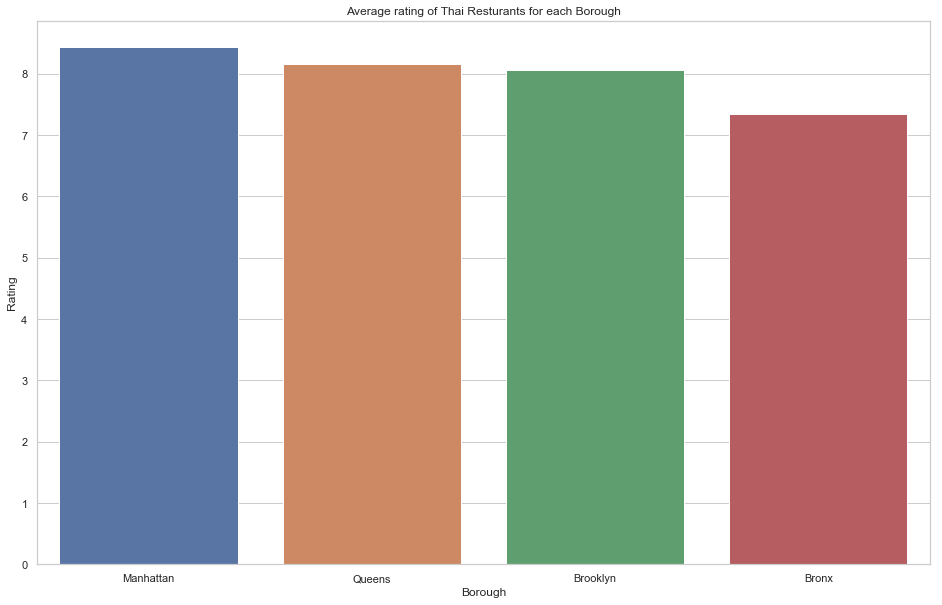

In [107]:
# Visualize
fig = plt.gcf()
fig.set_size_inches(16, 10)

sns.set(style="whitegrid")

ax = sns.barplot(x="Borough", y="Rating", data=thai_rest_group_Neighborhood).set_title('Average rating of Thai Resturants for each Borough')

In [109]:
# Filtered only Thai Restaurant with high rating (>=8.5)
thai_rest_high_rank=thai_rest_viz[thai_rest_viz['Average Rating']>=8.5]

In [110]:
thai_rest_high_rank.head()

,Neighborhood,Average Rating
25,Lenox Hill,9.15
38,Soho,9.05
26,Little Italy,9.05
5,Chinatown,9.05
14,East Williamsburg,8.90


In [111]:
# Join NY data with lat-long
latest_thai_rest=pd.merge(thai_rest_high_rank,new_york_data, on='Neighborhood')

In [112]:
latest_thai_rest

,Neighborhood,Average Rating,Borough,Latitude,Longitude
0,Lenox Hill,9.150000,Manhattan,40.768113,-73.958860
1,Soho,9.050000,Manhattan,40.722184,-74.000657
2,Little Italy,9.050000,Manhattan,40.719324,-73.997305
3,Chinatown,9.050000,Manhattan,40.715618,-73.994279
4,East Williamsburg,8.900000,Brooklyn,40.708492,-73.938858
5,South Ozone Park,8.900000,Queens,40.668550,-73.809865
6,Gowanus,8.850000,Brooklyn,40.673931,-73.994441
7,Yorkville,8.800000,Manhattan,40.775930,-73.947118
8,Clinton,8.750000,Manhattan,40.759101,-73.996119
9,Carroll Gardens,8.733333,Brooklyn,40.680540,-73.994654


In [130]:
from geopy.geocoders import Nominatim
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="th_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

In [132]:
# create map and display it
Thai_rest_NY = folium.Map(location=geo_location('New York'), zoom_start=12)

# instantiate a feature group for the incidents in the dataframe
group_rest = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in latest_thai_rest[['Latitude','Longitude']].values:
    group_rest.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

Lets add a new field to dataframe for labeling purpose

In [133]:
latest_thai_rest['Labels'] = latest_thai_rest['Neighborhood']+', '+ \
                                    latest_thai_rest['Borough']+' (Rating: '+ \
                                    latest_thai_rest['Average Rating'].map(str)+')'

In [134]:
latest_thai_rest

,Neighborhood,Average Rating,Borough,Latitude,Longitude,Labels
0,Lenox Hill,9.150000,Manhattan,40.768113,-73.958860,"Lenox Hill, Manhattan (Rating: 9.15)"
1,Soho,9.050000,Manhattan,40.722184,-74.000657,"Soho, Manhattan (Rating: 9.05)"
2,Little Italy,9.050000,Manhattan,40.719324,-73.997305,"Little Italy, Manhattan (Rating: 9.05)"
3,Chinatown,9.050000,Manhattan,40.715618,-73.994279,"Chinatown, Manhattan (Rating: 9.05)"
4,East Williamsburg,8.900000,Brooklyn,40.708492,-73.938858,"East Williamsburg, Brooklyn (Rating: 8.9)"
5,South Ozone Park,8.900000,Queens,40.668550,-73.809865,"South Ozone Park, Queens (Rating: 8.9)"
6,Gowanus,8.850000,Brooklyn,40.673931,-73.994441,"Gowanus, Brooklyn (Rating: 8.85)"
7,Yorkville,8.800000,Manhattan,40.775930,-73.947118,"Yorkville, Manhattan (Rating: 8.8)"
8,Clinton,8.750000,Manhattan,40.759101,-73.996119,"Clinton, Manhattan (Rating: 8.75)"
9,Carroll Gardens,8.733333,Brooklyn,40.680540,-73.994654,"Carroll Gardens, Brooklyn (Rating: 8.733333333..."


In [135]:
# add pop-up text to each marker on the map
for lat, lng, label in latest_thai_rest[['Latitude','Longitude','Labels']].values:
    folium.Marker([lat, lng], popup=label).add_to(Thai_rest_NY)        
# add incidents to map
Thai_rest_NY.add_child(group_rest)

Visualize choropleth map with Boroughs based on average Rating

In [140]:
choro_map = folium.Map(location=geo_location('New York'), zoom_start=12)
choro_geo = r'Borough Boundaries.geojson'

choro_map.choropleth(
    geo_data=choro_geo,
    data=latest_thai_rest,
    columns=['Borough', 'Average Rating'],
    key_on='feature.properties.boro_name',
    fill_color='YlOrRd', 
    fill_opacity=0.8, 
    line_opacity=0.2,
    legend_name='Average Rating'
)

# display map
# as this is huge map data , we will save it to a file
choro_map.save('thai_rating.html')